In [45]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [21]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [22]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [23]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [41]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]), 
                                 keras.layers.Dense(300, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ), 
                                 keras.layers.Dense(10, activation = "softmax" )]) 

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd",
              metrics = ["accuracy"]) 

In [28]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7275 - accuracy: 0.7634 - val_loss: 0.4997 - val_accuracy: 0.8358
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4910 - accuracy: 0.8297 - val_loss: 0.4509 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4472 - accuracy: 0.8444 - val_loss: 0.4445 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4189 - accuracy: 0.8538 - val_loss: 0.4004 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3988 - accuracy: 0.8593 - val_loss: 0.4039 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3820 - accuracy: 0.8661 - val_loss: 0.3735 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3677 - accuracy: 0.8709 - val_loss: 0.4054 - val_accuracy:

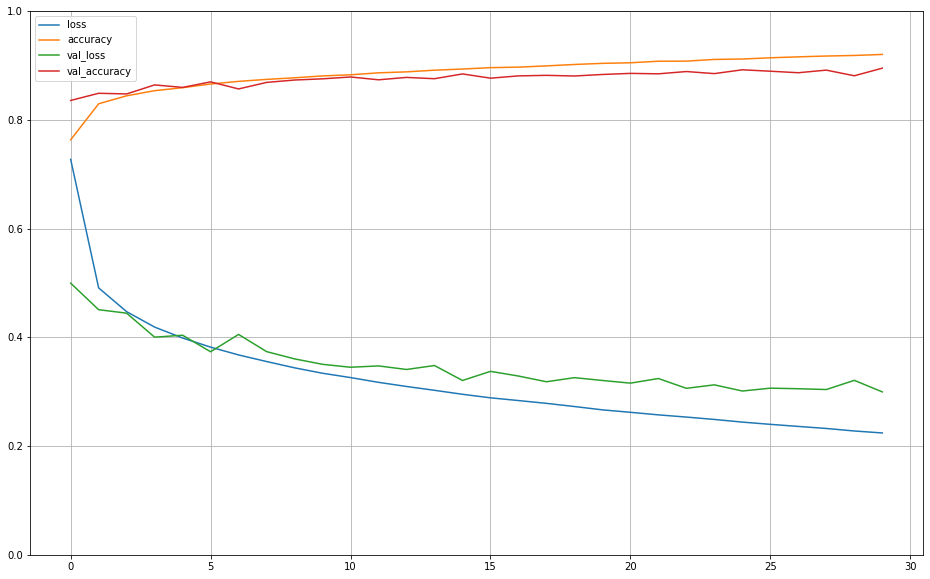

In [47]:
pd.DataFrame(history.history).plot(figsize = (16, 10)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 